### Loading liberary and dataset


In [1]:
library(ISLR2)
library(boot)
library(leaps)

attach(Portfolio)


### Alpha function


In [2]:
# Create a function to calculate alpha
alpha.fn <- function(data, index) {
    X <- data$X[index]
    Y <- data$Y[index]
    return(var(Y) - cov(X, Y)) / (var(X) + var(Y) - 2 * cov(X, Y))
}


### Bootstrap


In [3]:
# Estimate alpha using all 100 observations
alpha.fn(Portfolio, 1:100)
# Randomly select 100 observations from the dataset with replacement

set.seed(1)
alpha.fn(Portfolio, sample(100, 100, replace = T))
# Estimates based on 1000 bootstrap samples

boot(Portfolio, alpha.fn, R = 1000) # boot lib


[1] 0.6818792

[1] 0.7748313


ORDINARY NONPARAMETRIC BOOTSTRAP


Call:
boot(data = Portfolio, statistic = alpha.fn, R = 1000)


Bootstrap Statistics :
     original      bias    std. error
t1* 0.6818792 -0.01141145   0.1235559

In [4]:
set.seed(1)
a <- sample(-5:5, 10, replace = T)
# The ground truth should be 0, as sample() has uniform distribution.
print(paste0("Observation result: ", mean(a)))

# mean(a)
times <- 100
bootstrat_result <- rep(NA, times)

for (i in 1:times) {
    ith_resample <- sample(a, 10, replace = T)
    bootstrat_result[i] <- mean(ith_resample)
}

print(paste0("Bootstrap result: ", mean(bootstrat_result)))


[1] "Observation result: -0.3"
[1] "Bootstrap result: -0.234"


### Stepwise Selection


#### Check missing values


In [5]:
names(Hitters)
dim(Hitters)
sum(is.na(Hitters$Salary)) # Total number of missing salary ("NA")


[1] "AtBat"     "Hits"      "HmRun"     "Runs"      "RBI"       "Walks"    
 [7] "Years"     "CAtBat"    "CHits"     "CHmRun"    "CRuns"     "CRBI"     
[13] "CWalks"    "League"    "Division"  "PutOuts"   "Assists"   "Errors"   
[19] "Salary"    "NewLeague"

[1] 322  20

[1] 59

#### Delete rows that have missing values


In [6]:
Hitters <- na.omit(Hitters) # Remove rows with missing values in any variable
dim(Hitters)
sum(is.na(Hitters))


[1] 263  20

[1] 0

In [7]:
regfit.full <- regsubsets(Salary ~ ., Hitters)
# Print the best set of predictors for each model size;
# By default, only return results up to the best 8-predictor model
summary(regfit.full)


Subset selection object
Call: regsubsets.formula(Salary ~ ., Hitters)
19 Variables  (and intercept)
           Forced in Forced out
AtBat          FALSE      FALSE
Hits           FALSE      FALSE
HmRun          FALSE      FALSE
Runs           FALSE      FALSE
RBI            FALSE      FALSE
Walks          FALSE      FALSE
Years          FALSE      FALSE
CAtBat         FALSE      FALSE
CHits          FALSE      FALSE
CHmRun         FALSE      FALSE
CRuns          FALSE      FALSE
CRBI           FALSE      FALSE
CWalks         FALSE      FALSE
LeagueN        FALSE      FALSE
DivisionW      FALSE      FALSE
PutOuts        FALSE      FALSE
Assists        FALSE      FALSE
Errors         FALSE      FALSE
NewLeagueN     FALSE      FALSE
1 subsets of each size up to 8
Selection Algorithm: exhaustive
         AtBat Hits HmRun Runs RBI Walks Years CAtBat CHits CHmRun CRuns CRBI
1  ( 1 ) " "   " "  " "   " "  " " " "   " "   " "    " "   " "    " "   "*" 
2  ( 1 ) " "   "*"  " "   " "  " " " "   

In [8]:
# To return as many predictors as specified(Max=19)
regfit.full <- regsubsets(Salary ~ ., data = Hitters, nvmax = 19)
reg.summary <- summary(regfit.full)
names(reg.summary)
# summary(regfit.full)


[1] "which"  "rsq"    "rss"    "adjr2"  "cp"     "bic"    "outmat" "obj"

#### Plotting


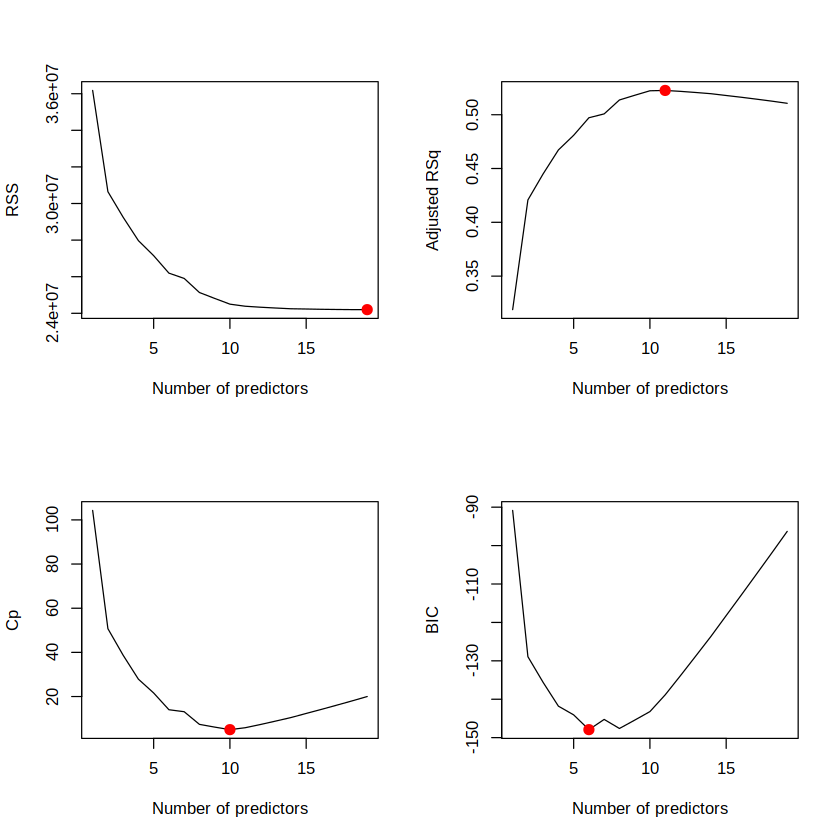

In [9]:
# Create figure contains four subfigure(2*2)
par(mfrow = c(2, 2))
# Figure 1 rss
plot(reg.summary$rss, xlab = "Number of predictors", ylab = "RSS", type = "l")
p <- which.min(reg.summary$rss)
points(p, reg.summary$rss[p], col = "red", cex = 2, pch = 20)

# Figure 2 adjr2
plot(reg.summary$adjr2, xlab = "Number of predictors", ylab = "Adjusted RSq", type = "l")
a <- which.max(reg.summary$adjr2)
# Highlight maximizer
points(a, reg.summary$adjr2[a], col = "red", cex = 2, pch = 20)

# Figure 3 cp
plot(reg.summary$cp, xlab = "Number of predictors", ylab = "Cp", type = "l")
b <- which.min(reg.summary$cp)
points(b, reg.summary$cp[b], col = "red", cex = 2, pch = 20)

# Figure 4 bic
plot(reg.summary$bic, xlab = "Number of predictors", ylab = "BIC", type = "l")
c <- which.min(reg.summary$bic)
points(c, reg.summary$bic[c], col = "red", cex = 2, pch = 20)
# Print the coefficient estimates of the best model by BIC coef(regfit.full,c)


In [10]:
coef(regfit.full, c)


(Intercept)        AtBat         Hits        Walks         CRBI    DivisionW 
  91.5117981   -1.8685892    7.6043976    3.6976468    0.6430169 -122.9515338 
     PutOuts 
   0.2643076

### Stepwise Selection - backward


In [11]:
regfit.fwd <- regsubsets(Salary ~ ., data = Hitters, nvmax = 19, method = "forward")
# summary(regfit.fwd)
print(summary(regfit.fwd)$bic) # (or cp, adjr2)

regfit.bwd <- regsubsets(Salary ~ ., data = Hitters, nvmax = 19, method = "backward")
# summary(regfit.bwd)
print(summary(regfit.bwd)$bic)

# Print the coefficient estimates of the 7-predictor model
print(coef(regfit.full, 7))
print(coef(regfit.fwd, 7))
print(coef(regfit.bwd, 7))


 [1]  -90.84637 -128.92622 -135.62693 -141.80892 -144.07143 -147.91690
 [7] -144.77245 -147.38199 -145.44316 -143.21651 -138.86077 -133.87283
[13] -128.77759 -123.64420 -118.21832 -112.81768 -107.35339 -101.86391
[19]  -96.30412
 [1]  -88.97559 -124.18997 -134.21006 -137.33435 -140.61064 -143.14927
 [7] -144.98259 -147.38199 -145.44316 -143.21651 -138.86077 -133.87283
[13] -128.77759 -123.64420 -118.21832 -112.81768 -107.35339 -101.86391
[19]  -96.30412
 (Intercept)         Hits        Walks       CAtBat        CHits       CHmRun 
  79.4509472    1.2833513    3.2274264   -0.3752350    1.4957073    1.4420538 
   DivisionW      PutOuts 
-129.9866432    0.2366813 
 (Intercept)        AtBat         Hits        Walks         CRBI       CWalks 
 109.7873062   -1.9588851    7.4498772    4.9131401    0.8537622   -0.3053070 
   DivisionW      PutOuts 
-127.1223928    0.2533404 
 (Intercept)        AtBat         Hits        Walks        CRuns       CWalks 
 105.6487488   -1.9762838    6.7574914 

### CV for model selection


In [12]:
# Randomly split data into a training set and a test
set.seed(1)
train <- sample(c(TRUE, FALSE), nrow(Hitters), rep = TRUE)
test <- (!train)
# Perform best subset selection
regfit.best <- regsubsets(Salary ~ ., data = Hitters[train, ], nvmax = 19)
# Building an "X" matrix from test data
test.mat <- model.matrix(Salary ~ ., data = Hitters[test, ])

# Compute test MSE of the 19 models(size from 1 to 19)
val.errors <- rep(NA, 19)
for (i in 1:19) {
    coefi <- coef(regfit.best, id = i)
    pred <- test.mat[, names(coefi)] %*% coefi
    # Matrix product
    val.errors[i] <- mean((Hitters$Salary[test] - pred)^2) # MSE
}
val.errors


[1] 164377.3 144405.5 152175.7 145198.4 137902.1 139175.7 126849.0 136191.4
 [9] 132889.6 135434.9 136963.3 140694.9 140690.9 141951.2 141508.2 142164.4
[17] 141767.4 142339.6 142238.2

### Find best model from CV


In [13]:
# Find the best model (min)
best_size <- which.min(val.errors)
coef(regfit.best, best_size)

# After finding the best model,
# We need to fit this model using the full data set to obtain more accurate coefficient estimates
regfit.best <- regsubsets(Salary ~ ., data = Hitters, nvmax = 19)
coef(regfit.best, best_size)


(Intercept)        AtBat         Hits        Walks        CRuns       CWalks 
  67.1085369   -2.1462987    7.0149547    8.0716640    1.2425113   -0.8337844 
   DivisionW      PutOuts 
-118.4364998    0.2526925

(Intercept)         Hits        Walks       CAtBat        CHits       CHmRun 
  79.4509472    1.2833513    3.2274264   -0.3752350    1.4957073    1.4420538 
   DivisionW      PutOuts 
-129.9866432    0.2366813